# Project: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are a Data Scientist at Foodhub and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

#### Import libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### data overview

In [2]:
data = pd.read_csv("foodhub_order.csv")
df = data.copy()
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


In [3]:
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [4]:
df.duplicated().sum()

0

- no missing value or duplicates.

#### **Question 1:** How many rows and columns are present in the data?

In [5]:
df.shape

(1898, 9)

- It has 1898 rows and 9 columns.

#### **Question 2:** What are the datatypes of the different columns in the dataset?

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


- 'order_id', 'customer_id', 'food_preparation_time', and 'delivery_time' are integers.
- 'restaurant_name', 'cuisine_type', 'day_of_the_week', and 'rating' are objects.
- 'cost_of_the_order' is a float. 

#### **Question 3:** 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? 

In [7]:
df.restaurant_name = df.restaurant_name.astype("category")     
df.cuisine_type = df.cuisine_type.astype("category")         
df.day_of_the_week = df.day_of_the_week.astype("category")  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


- It reduced memory usage. 

#### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

In [8]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


- Cost of an order ranges from \\$4.47 to \\$35.41. Average order cost is \\$16.5. 75% of the orders are below \\$23. This indicates that most of the customers prefer low-cost food compared to  more expensive ones.
- Food preparation time ranges from 20 to 35 mins, with an average of around 27 mins. The spread is not very high.
- Delivery time ranges from 15 to 33 mins, with an average of around 24 mins.

#### **Question 5:** How many orders are not rated?

In [9]:
df["rating"].value_counts() 

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

- There are 736 orders that are not rated.

#### **Question 6:** Explore all the variables and provide observations on their distributions.

In [10]:
# Function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )
        else:
            label = p.get_height()  

        x = p.get_x() + p.get_width() / 2  
        y = p.get_height() 

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  

    plt.show()

#### Order ID

In [11]:
df["order_id"].value_counts().shape

(1898,)

- There are 1898 unique orders.

#### Customer ID

In [12]:
df["customer_id"].value_counts().shape

(1200,)

- There are 1200 customers. Given that there are 1898 orders, there are customers who have placed more than one order. 

In [13]:
df["customer_id"].value_counts()

52832     13
47440     10
83287      9
250494     8
65009      7
          ..
66393      1
142170     1
332635     1
147519     1
385023     1
Name: customer_id, Length: 1200, dtype: int64

In [14]:
repeat_cus = df["customer_id"].value_counts()
repeat_cus = repeat_cus[repeat_cus>5]
repeat_cus

52832     13
47440     10
83287      9
250494     8
65009      7
259341     7
82041      7
276192     7
115213     6
97079      6
60052      6
107909     6
275689     6
97991      6
Name: customer_id, dtype: int64

- These are customers who have ordered more than 5 times. 
- Customer with ID 52832 has ordered 13 times.

#### Restaurant name

In [15]:
df["restaurant_name"].value_counts().shape

(178,)

In [16]:
df["restaurant_name"].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

In [17]:
over_50 = df["restaurant_name"].value_counts()
over_50 = over_50[over_50>50]
over_50

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
RedFarm Broadway              59
RedFarm Hudson                55
Name: restaurant_name, dtype: int64

- There are 178 restaurants.
- Shake Shack is the most popular one. It had 219 orders. 
- There are 7 restaurants that had over 50 orders. 

#### Cuisine type

In [18]:
df["cuisine_type"].value_counts().shape

(14,)

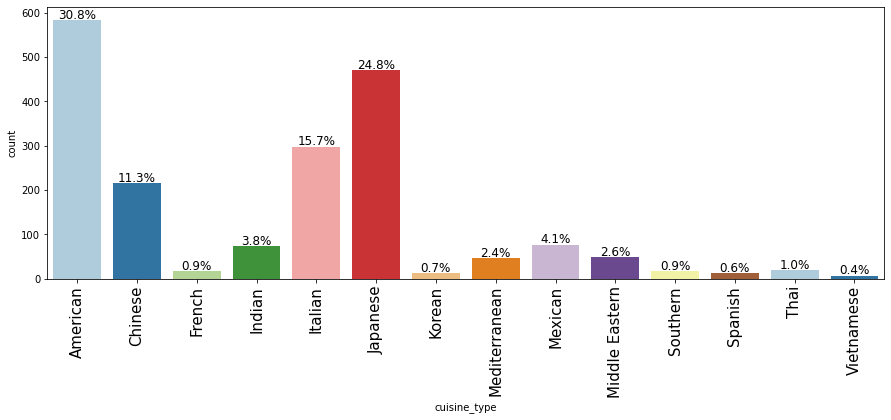

In [19]:
labeled_barplot(df, "cuisine_type", perc=True)

- There are 14 cuisine types.
- American food, Japanese food, and Italian food are the most popular ones.
- Vietnamese food appears to be the least popular.

#### Cost of the order

<AxesSubplot:xlabel='cost_of_the_order', ylabel='Count'>

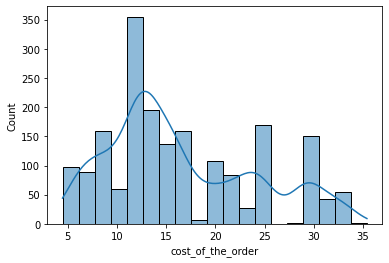

In [20]:
sns.histplot(data=df, x="cost_of_the_order", kde=True)

- It appears that a large chunk of people ordered food that costs between \\$11 - \\$15.
- There were only a small amount of order that costed more than \\$30.

#### Day of the week

In [21]:
df['day_of_the_week'].value_counts()

Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64

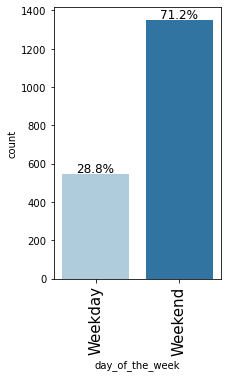

In [22]:
labeled_barplot(df, 'day_of_the_week', perc=True) 

- The distribution shows that 71% of orders were placed on weekends.

#### Rating

In [23]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

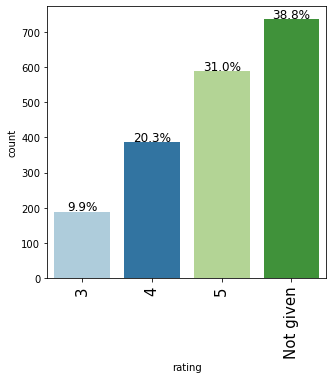

In [24]:
labeled_barplot(df, 'rating', perc=True)

- Almost 40% of the orders didn't receive a rating. This is an area that can be improved.

#### Food Preparation time

<AxesSubplot:xlabel='food_preparation_time', ylabel='Count'>

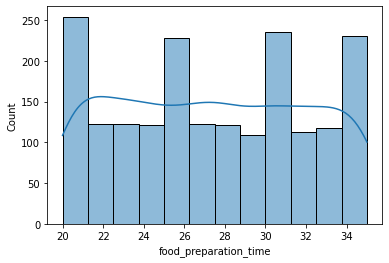

In [25]:
sns.histplot(data=df, x="food_preparation_time", kde=True)

- Food preparation time is pretty evenly distributed between 20 and 35 mins. 

#### Delivery time

<AxesSubplot:xlabel='delivery_time', ylabel='Count'>

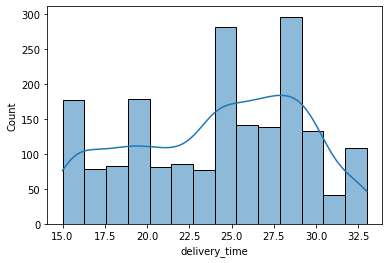

In [26]:
sns.histplot(data=df, x="delivery_time", kde=True)

- A good portion of the deliveries took 25-30 mins. 
- A small amount of orders took over 30 mins to deliver. This could use some improvement. 

#### **Question 7:** Which are the top 5 restaurants in terms of the number of orders received?

In [27]:
df["restaurant_name"].value_counts()[:5]

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### **Question 8:** Which is the most popular cuisine on weekends?

In [28]:
df_weekend = df[df["day_of_the_week"] == "Weekend"]
df_weekend["cuisine_type"].value_counts()

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### **Question 9:** What percentage of the orders cost more than 20 dollars?


In [29]:
df_greater_than_20 = df[df["cost_of_the_order"]>20] 

percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
percentage

29.24130663856691

#### **Question 10:** What is the average order delivery time?

In [30]:
ave_del_time = df["delivery_time"].mean()  
ave_del_time

24.161749209694417

#### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [31]:
df["customer_id"].value_counts().head(10)

52832     13
47440     10
83287      9
250494     8
65009      7
259341     7
82041      7
276192     7
115213     6
97079      6
Name: customer_id, dtype: int64

- 4 customers tied at the 5th spot with 7 orders, discount should be given to the top 8 customers.

#### Question 12: What are the top 10 restaurants in terms of revenue?

In [32]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(10)

restaurant_name
Shake Shack                      3579.53
The Meatball Shop                2145.21
Blue Ribbon Sushi                1903.95
Blue Ribbon Fried Chicken        1662.29
Parm                             1112.76
RedFarm Broadway                  965.13
RedFarm Hudson                    921.21
TAO                               834.50
Han Dynasty                       755.29
Blue Ribbon Sushi Bar & Grill     666.62
Name: cost_of_the_order, dtype: float64

#### **Question 13:** Perform a multivariate analysis to explore relationships between the important variables in the dataset. 

#### Cuisine vs Cost of the order

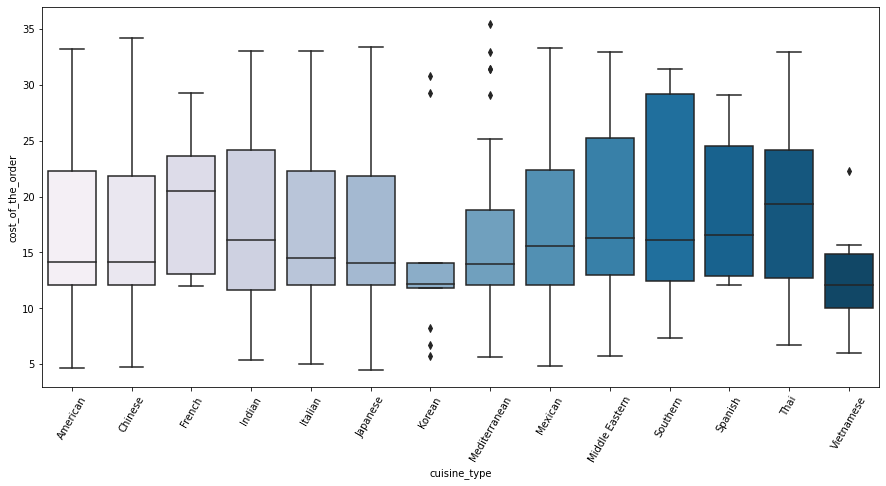

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(x = 'cuisine_type', y = 'cost_of_the_order', data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

- Vietnamese food and Korean food are less expensive compared to other cuisines.
- Majority of the orders cost between \\$12 to \\$25.

#### Cuisine vs Food Preparation time

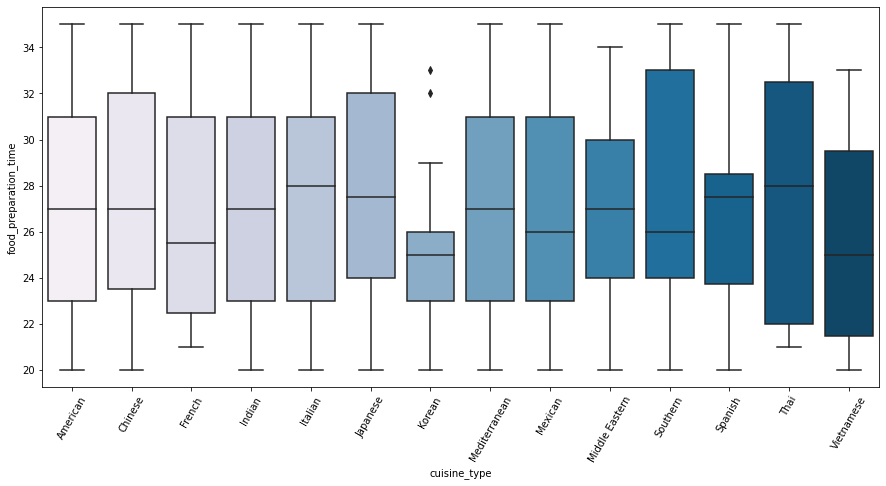

In [34]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', palette = 'PuBu') 
plt.xticks(rotation = 60)
plt.show()

- Koreans food preparation time is within a smaller range, and it takes less time to cook compared to other types of food. 
- Vietnamese food also takes a little bit less time to prepare since it has the lowest median and lower quartile.
- Majority of the orders have a preparation time between 23 to 32 mins. 

#### Day of the Week vs Delivery time

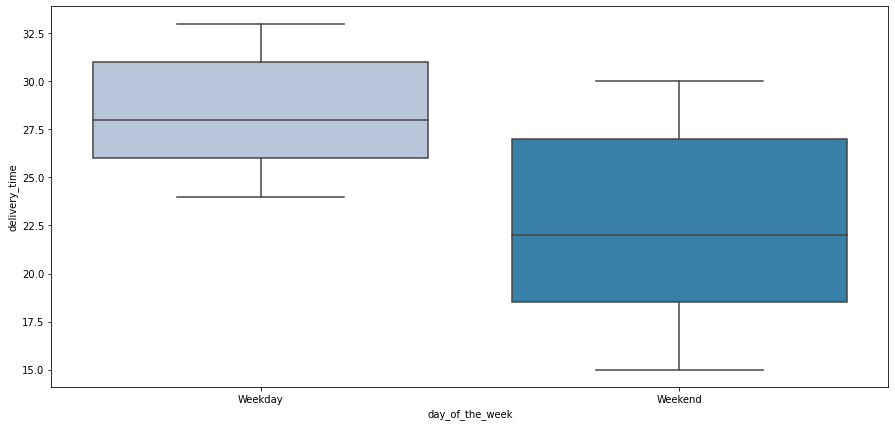

In [35]:
plt.figure(figsize=(15,7))
sns.boxplot(data=df, x='day_of_the_week', y='delivery_time', palette = 'PuBu')
plt.show()

- Delivery time is longer during the week.
- Delivery time is always below 30 mins on the weekend. However, some weekday orders would take more than 30 mins to deliver. Weekday delivery time could use improvement. 

#### Rating vs Delivery time

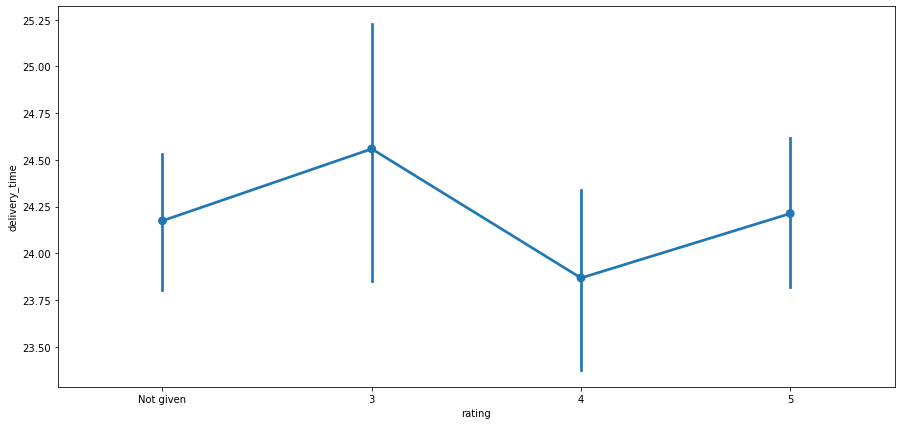

In [36]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x = 'rating', y = 'delivery_time', order=['Not given','3','4','5'])
plt.show()

In [37]:
from scipy.stats import levene
statistic, p_value = levene(df['delivery_time'][df['rating']=='Not given'],
                            df['delivery_time'][df['rating']=='3'], 
                            df['delivery_time'][df['rating']=='4'],
                            df['delivery_time'][df['rating']=='5'])

print('The p-value is', p_value)

The p-value is 0.15543588486169913


- Even though, based on the graph, it seems that delivery time has an impact on the rating, one-way ANOVA test proves that it doesn't. 

#### Rating vs Food preparation time

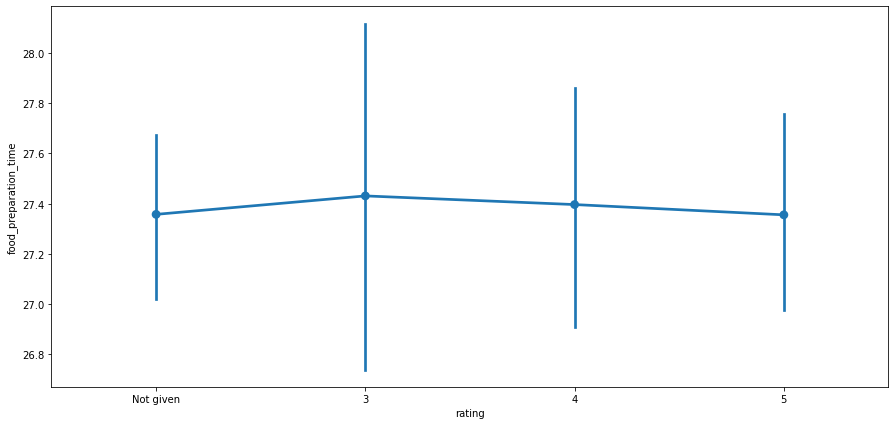

In [38]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x = 'rating', y ='food_preparation_time',order=['Not given','3','4','5'])  
plt.show()

In [39]:
statistic, p_value = levene(df['food_preparation_time'][df['rating']=='Not given'],
                            df['food_preparation_time'][df['rating']=='3'], 
                            df['food_preparation_time'][df['rating']=='4'],
                            df['food_preparation_time'][df['rating']=='5'])

print('The p-value is', p_value)

The p-value is 0.5422948265344869


- It appears that food preparation time doesn't affect ratings.

#### Rating vs Cost of the order

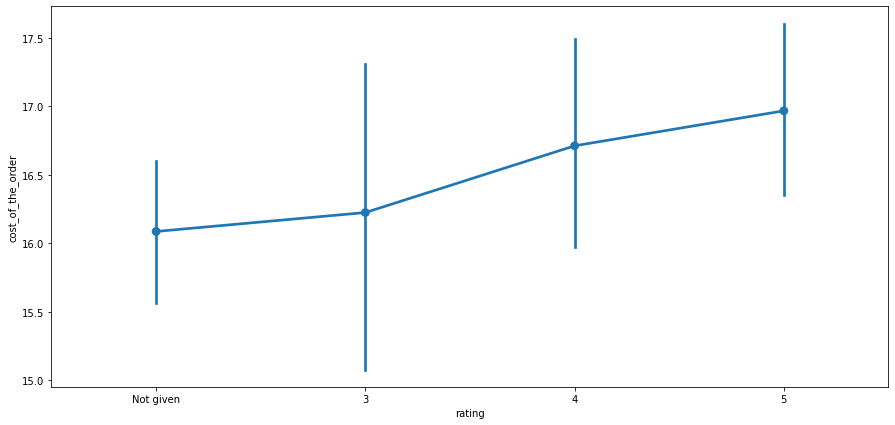

In [40]:
plt.figure(figsize=(15, 7))
sns.pointplot(data=df, x = 'rating', y ='cost_of_the_order',order=['Not given','3','4','5'])
plt.show()

In [41]:
statistic, p_value = levene(df['cost_of_the_order'][df['rating']=='Not given'],
                            df['cost_of_the_order'][df['rating']=='3'], 
                            df['cost_of_the_order'][df['rating']=='4'],
                            df['cost_of_the_order'][df['rating']=='5'])

print('The p-value is', p_value)

The p-value is 0.44298395414981906


- Again, based on the graph, it seems that cost of the order impacts rating, one-way ANOVA test proves that it has no impact on the ratings.

In [42]:
import scipy.stats as stats

In [43]:
crosstab = pd.crosstab(df['cuisine_type'], df['rating'])
 
Ho = "cuisine_type has no effect on rating"  
Ha = "cuisine_type has an effect on rating"  

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

cuisine_type has no effect on rating as the p_value (0.419) > 0.05


In [44]:
crosstab = pd.crosstab(df['day_of_the_week'], df['rating'])
 
Ho = "day_of_the_week has no effect on rating"  
Ha = "day_of_the_week has an effect on rating"  

chi, p_value, dof, expected = stats.chi2_contingency(crosstab)

if p_value < 0.05:  
    print(f"{Ha} as the p_value ({p_value.round(3)}) < 0.05")
else:
    print(f"{Ho} as the p_value ({p_value.round(3)}) > 0.05")

day_of_the_week has no effect on rating as the p_value (0.518) > 0.05


#### Correlation among variables

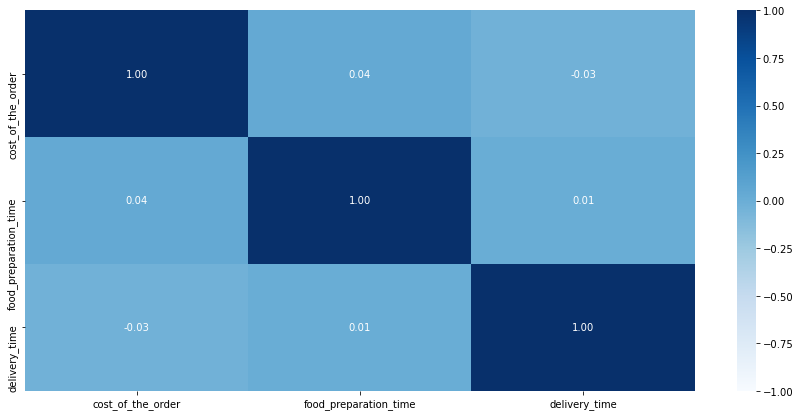

In [45]:
cols_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Blues"
)
plt.show()

- There is no correlation between them. 

#### **Question 14:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [46]:
rated = df[df['rating']!='Not given']
rated['rating'] = rated['rating'].astype('int')
rated.dtypes
rated_count = rated.groupby('restaurant_name').rating.count()
rated_50 = rated_count[rated_count>50]
rated_50
rated_ave = rated.groupby('restaurant_name').rating.mean()
rated_4 = rated_ave[rated_ave>4]
rated_4
comb = pd.merge(rated_4, rated_50, how='inner', on='restaurant_name', suffixes=(' average', ' counts'))
comb

,rating average,rating counts
restaurant_name,,
Blue Ribbon Fried Chicken,4.328125,64
Blue Ribbon Sushi,4.219178,73
Shake Shack,4.278195,133
The Meatball Shop,4.511905,84


#### **Question 15:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. 

In [47]:
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [48]:
total_rev = df['Revenue'].sum() 
total_rev

6166.303

#### **Question 16:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)


In [49]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
time_over_60 = df[df['total_time']>60]
time_over_60

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue,total_time
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,0.8955,63
10,1477895,143926,Big Wong Restaurant _¤¾Ñ¼,Chinese,5.92,Weekday,Not given,34,28,0.8880,62
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,2.4300,61
24,1476714,363783,Cafe Mogador,Middle Eastern,15.86,Weekday,Not given,32,29,2.3790,61
54,1477760,130507,Jack's Wife Freda,Mediterranean,22.75,Weekend,3,35,29,5.6875,64
...,...,...,...,...,...,...,...,...,...,...,...
1869,1476923,50199,J. G. Melon,American,19.40,Weekday,4,35,26,2.9100,61
1873,1478148,261371,Shake Shack,American,22.31,Weekend,Not given,35,28,5.5775,63
1875,1478039,292343,Amy Ruth's,Southern,12.23,Weekday,Not given,32,33,1.8345,65
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,2.0955,62


In [50]:
print ('The percentage of orders that have more than 60 minutes of total delivery time is',
       round(df[df['total_time'] > 60].shape[0] / df.shape[0] * 100, 2),'%')

The percentage of orders that have more than 60 minutes of total delivery time is 10.54 %


#### **Question 17:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [51]:
df.groupby('day_of_the_week').delivery_time.mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

- Average delivery time on weekdays is 28 mins, it is a bit higher than the 22 mins on weekends.

### Conclusions and Recommendations

Conclusions

- There were 736 orders that are not rated. They account for 40% of the orders. 

- Shake Shack was the most popular restaurant with over 200 orders. It also generated the highest revenue.

- There were 14 types of cuisines. American, Japanese, Italian, and Chinese made up for 80% of the orders. 

- There were double the orders on the weekend. 

- Delivery time is always below 30 mins on the weekend. However, there were orders that would take more than 30 mins to deliver on weekdays.

- There were 10% of the orders have a total delivery time (preparation + delivery) of 60 mins or more. 

Recommendations

- More American, Japanese, Italian, and Chinese food restaurants should be brought onboard because they are very popular.
- Reasons why weekday deliveries take longer should be investigated. To provide a better experience, the app should try to have all orders delivered in less than 30 mins. 
- Repeart customers should rewarded. It would incentivize them place more orders.
- The app should find ways to encourage people to leave ratings. Here are a few suggestions:
    - makes it easy for customers to leave a rating: maybe the page could be simplified, maybe timing of the request could be adjusted, etc..
    - offer incentives, e.g. discount for next order and reward system